<IPython.core.display.Javascript object>


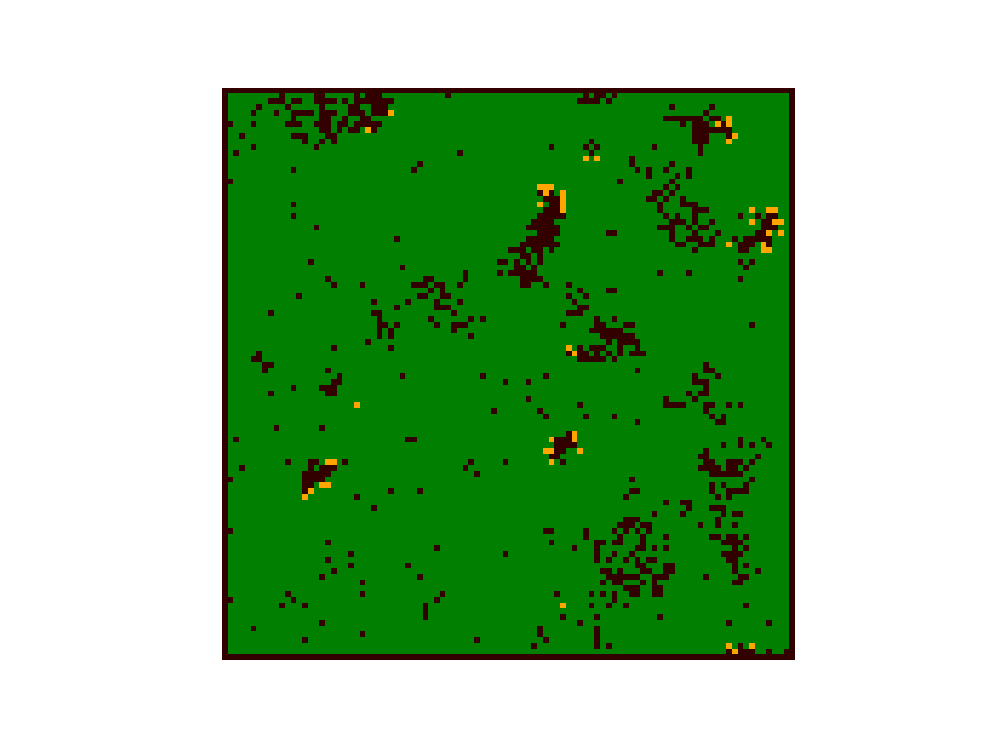

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors

%matplotlib notebook

# Create a forest fire animation based on a simple cellular automaton model.
# The maths behind this code is described in the scipython blog article
# at https://scipython.com/blog/the-forest-fire-model/
# Christian Hill, January 2016.
# Updated January 2020.

# Displacements from a cell to its eight nearest neighbours
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2
# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((ny, nx))
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
                for dx,dy in neighbourhood:
                    # The diagonally-adjacent trees are further away, so
                    # only catch fire with a reduced probability:
                    if abs(dx) == abs(dy) and np.random.random() < 0.573*q:
                        continue
                    if X[iy+dy,ix+dx] == FIRE and np.random.random() <= q:
                        X1[iy,ix] = FIRE
                        break
                else:
                    if np.random.random() <= f:
                        X1[iy,ix] = FIRE
    return X1

# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.05, 0.0001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100

## probability (q) with which fire spreads if neighboring tree is on fire 
q = 0.23

# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
ax.set_axis_off()
im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
def animate(i):
    im.set_data(animate.X)
    animate.X = iterate(animate.X)
# Bind our grid to the identifier X in the animate function's namespace.
animate.X = X

# Interval between frames (ms).
interval = 10
anim = animation.FuncAnimation(fig, animate, interval=interval, frames=200)
plt.show()
